PyTorch에서 **텐서(Tensor)**는 데이터를 표현하는 기본 단위입니다. 이는 다차원 배열(n-dimensional array)로, 딥러닝 모델의 입력, 출력, 가중치 등을 표현하고 연산하는 데 사용됩니다.  
텐서는 NumPy의 배열과 유사하지만, GPU 가속을 활용할 수 있다는 점에서 차별화됩니다.

텐서의 특징
1. 다차원 배열

텐서는 스칼라(0차원)부터 벡터(1차원), 행렬(2차원), 고차원 배열까지 표현할 수 있습니다.
예를 들어:
스칼라(0D 텐서): 5

벡터(1D 텐서): [1,2,3]

행렬(2D 텐서): [[1,2],[3,4]]

텐서 (3D 텐서): 여러 개의 행렬이 쌓여 있는 구조. 교재 35페이지 그림

2. GPU 가속 가능

텐서는 CPU뿐 아니라 GPU에서도 연산이 가능합니다.
GPU에서 연산하려면 텐서를 .to('cuda') 또는 .cuda()를 사용하여 GPU로 옮깁니다.

3. 자동 미분 지원

텐서는 PyTorch의 자동 미분(Autograd) 기능과 연동됩니다. 이를 통해 텐서 연산의 기울기를 자동으로 계산할 수 있습니다.  
예: requires_grad=True로 설정하면 텐서의 연산 기록을 저장하여 역전파(backpropagation)에 활용합니다.

4. 다양한 자료형 지원

PyTorch 텐서는 다양한 데이터 타입을 지원합니다 (e.g., float32, int64 등).
예: torch.float, torch.int, torch.bool, torch.complex64 등.


In [72]:
##2.2.1 텐서 다루기

In [73]:
# pip install torch

In [74]:
# 파이토치에서 텐서 표현 
import torch
torch.cuda.is_available() # false이면 CPU 사용 

True

PyTorch의 **연산 그래프(Computational Graph)**는 딥러닝 모델 학습 과정에서 **자동 미분(Autograd)**을 가능하게 하는 핵심 구조입니다. 연산 그래프는 모델의 파라미터가 어떻게 입력 데이터에서 출력으로 전달되는지, 그리고 손실 함수가 어떻게 계산되는지를 나타내는 데이터의 연산 경로를 추적하는 구조입니다.

연산 그래프는 딥러닝에서 중요한 역전파(Backpropagation) 과정을 자동화하기 위해 필요합니다. 딥러닝의 목표는 손실(loss)을 최소화하기 위해 모델 파라미터(예: 가중치 
𝑤와 편향 𝑏)를 학습시키는 것입니다. 이를 위해 **기울기(Gradient)**를 계산해야 합니다. 


1.기울기 자동 계산

PyTorch는 연산 그래프를 기반으로 기울기를 자동으로 계산합니다. 사용자가 직접 복잡한 미분 공식을 유도할 필요가 없습니다.
예를 들어, 

L=(wx+b) **2
 라는 손실 함수가 있을 때, 연산 그래프를 통해 
기울기 2wx를 자동으로 계산합니다.

2. 효율적인 역전파

연산 그래프는 **체인 룰(Chain Rule)**을 적용하여 입력부터 출력까지 모든 연산의 미분을 효율적으로 계산합니다.
역전파 과정에서 그래프의 각 연산 노드에서 기울기를 계산하고 전파합니다.

3. 동적 계산 지원
PyTorch는 **동적 연산 그래프(Dynamic Computational Graph)**를 사용합니다. 즉, 연산이 수행될 때 그래프가 실시간으로 생성됩니다.
이런 동적 특성 덕분에 조건문, 반복문 등의 구조적인 변화가 있는 모델도 쉽게 정의할 수 있습니다.

연산 그래프의 용도
1. 기울기 계산 (자동 미분)
연산 그래프를 사용하면, 모델의 파라미터에 대한 손실 함수의 기울기를 자동으로 계산할 수 있습니다. PyTorch에서

In [75]:
## 연산 그래프가 각 줄이 연결된다
    
import torch

# requires_grad=True 설정된 텐서
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# 연산 정의
y = w * x + b
loss = y ** 2  # 손실 함수

# 역전파
loss.backward()

# 각 텐서의 기울기 출력
print(w.grad)  # dy/dw
print(x.grad)  # dy/dx
print(b.grad)  # dy/db


tensor(28.)
tensor(42.)
tensor(14.)


2. 딥러닝 학습(역전파 기반의 가중치 업데이트)
연산 그래프는 딥러닝 모델의 학습 과정에서 손실 함수의 기울기를 계산하고, 이를 기반으로 가중치를 업데이트합니다.

1.순전파(Forward Pass):
입력 데이터를 연산 그래프를 따라 계산하여 출력(예측값)을 생성.
2. 손실 계산:
출력값과 실제 값 사이의 손실을 계산.
3. 역전파(Backward Pass):
연산 그래프를 따라 손실 함수의 기울기를 계산.
4. 가중치 업데이트:
기울기를 사용하여 경사하강법(Gradient Descent)으로 가중치를 업데이트.

In [76]:
# Optimizer를 활용한 가중치 업데이트
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 역전파 후 가중치 업데이트
optimizer.step()

2.2.1 텐서 다루기 

In [77]:
import torch # GPU를 지원하는 텐서 패키지
t = torch.tensor([[1, 2], [3, 4]])
print(t.type) # 텐서 객체를 만든다
print('------------------------')
#print(torch.tensor([[1,2],[3,4]], device="cuda:0")) # GPU가 없다면 오류가 발생하므로 주석 처리하였습니다.
print('------------------------')

print(torch.tensor([[1,2],[3,4]], dtype=torch.float64))

<built-in method type of Tensor object at 0x00000223E584D950>
------------------------
------------------------
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [78]:
temp = torch.tensor([[1,2],[3,4]])
print(temp)
print(temp.numpy()) # 텐서를 ndarray로 변환
print(temp.device) #device 속성을 확인
print('------------------------')
#temp = torch.tensor([[1,2],[3,4]], device="cuda:0") #GPU가 없다면 오류가 발생하므로 주석 처리하였습니다.
print(temp) #cpu tensor와 구분
print(temp.device)  # 출력: cuda:0 // gpu 활성화 안 하면 cpu
#print(temp.numpy()) # cuda tensor > ndarray로 변환 안된다
#temp = torch.tensor([[1,2],[3,4]], device="cuda:0")# GPU
print(temp.to("cpu").numpy())

tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]
cpu
------------------------
tensor([[1, 2],
        [3, 4]])
cpu
[[1 2]
 [3 4]]


텐서의 인덱스 조작 

In [79]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])
print(temp)
print(temp[0], temp[1], temp[-1])
print('------------------------')
print(temp[2:5], temp[4:-1]) #넘파이 슬라이싱과 같다 

tensor([1., 2., 3., 4., 5., 6., 7.])
tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


텐서 연산 및 차원 조작

In [80]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w - v) # 벡터 연산
print(w * v) # 벡터 연산 

tensor([2, 2, 3])
tensor([ 3,  8, 18])


In [81]:
temp = torch.tensor([
    [1, 2], [3, 4]
])

print(temp.shape)
print('------------------------')
print(temp.view(4,1)) # (4,1)
print('------------------------')
t2= temp.view(-1) # [4] - 넘파이의 reshape()과 유사
print(t2.shape)
print(temp.view(-1)) # (4,) - 1차원 벡터로 변환 
print('------------------------')
print(temp.view(1, -1)) # (1,4) > (1, ?)로 변환
print('------------------------')
print(temp.view(-1, 1)) # (4,1) > (?, 1)로 변환

torch.Size([2, 2])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
torch.Size([4])
tensor([1, 2, 3, 4])
------------------------
tensor([[1, 2, 3, 4]])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])


In [82]:
import pandas as pd
import torch
data=pd.read_csv('./book/chap09/data/class2.csv')

In [83]:
print(data)

   Unnamed: 0      id tissue class class2      x      y      r
0           0  mdb000      C  CIRC      N  535.0  475.0  192.0
1           1  mdb001      A  CIRA      N  433.0  268.0   58.0
2           2  mdb002      A  CIRA      I    NaN    NaN    NaN
3           3  mdb003      C  CIRC      B    NaN    NaN    NaN
4           4  mdb004      F  CIRF      I  488.0  145.0   29.0
5           5  mdb005      F  CIRF      B  544.0  178.0   26.0


In [84]:
#왜 unsqueeze()를 하는가?
x=torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y=torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
print(x)

tensor([[535.],
        [433.],
        [ nan],
        [ nan],
        [488.],
        [544.]])


unsqueeze()는 PyTorch에서 텐서의 차원(dimension)을 추가하는 데 사용되는 메서드입니다.  
즉, 기존 텐서의 특정 위치에 크기가 1인 차원을 삽입하여 텐서의 모양(shape)을 변경합니다.

tensor.unsqueeze(dim)
dim: 새로 추가할 차원의 위치를 지정합니다. 음수를 사용하면 뒤에서부터 차원을 계산합니다.  
결과: 지정된 위치에 크기가 1인 차원이 추가된 새로운 텐서를 반환합니다.  


In [85]:
import torch

x = torch.tensor([1, 2, 3])  # x의 shape: (3,)
x_unsqueezed = x.unsqueeze(0)  # dim=0에 차원을 추가
print(x_unsqueezed.shape)  # 출력: torch.Size([1, 3])

x_unsqueezed = x.unsqueeze(1)  # dim=1에 차원을 추가
print(x_unsqueezed.shape)  # 출력: torch.Size([3, 1])

torch.Size([1, 3])
torch.Size([3, 1])


x.unsqueeze(0): (3,) → (1, 3) (배열의 맨 앞에 차원이 추가됨).
x.unsqueeze(1): (3,) → (3, 1) (배열의 두 번째 차원에 추가됨).

In [86]:
# x_unsqueezed = x.unsqueeze(2)  Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [87]:
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
print(x, x.type)

tensor([[535.],
        [433.],
        [ nan],
        [ nan],
        [488.],
        [544.]]) <built-in method type of Tensor object at 0x00000223E584EBC0>


1. torch.from_numpy(data['x'].values)
data['x'].values: NumPy 배열 형태의 데이터를 PyTorch 텐서로 변환.
예를 들어, data['x'].values의 형태가 (N,)라고 가정.

2. .unsqueeze(dim=1)
dim=1에 크기가 1인 차원을 추가.
기존 텐서의 shape이 (N,)라면, unsqueeze(dim=1)의 결과는 (N, 1)이 됩니다.  
이 과정은 일반적으로 딥러닝 모델에 입력 데이터를 맞추기 위해 사용됩니다.
(예: 입력 데이터가 2D 형태인 (N, 1)이 되어야 하는 경우)

왜 unsqueeze(dim=1)이 필요한가?  
많은 딥러닝 모델은 2D 입력을 필요로 합니다. 특히, 선형 회귀나 MLP(Multi-Layer Perceptron) 같은 모델에서는 각 입력 데이터가 (N, D) 형태(즉, N개의 샘플에 대해 D차원 특성 벡터)여야 합니다.

예를 들어:  
원래 데이터가 1D 텐서: [x1, x2, x3, ...] (shape: (N,)).  
이를 2D로 변경: [[x1], [x2], [x3], ...] (shape: (N, 1)).  
unsqueeze(dim=1)을 사용하여 2D 텐서로 확장합니다.


covtype.csv는 Covertype 데이터셋으로, 미국 콜로라도주의 국립공원의 토양 및 식생 유형을 예측하기 위한 표준 데이터셋입니다.  
이 데이터셋은 UCI 머신러닝 저장소에 공개되어 있으며, CSV 형식으로 다운로드할 수 있습니다.



Custom dataset을 만들어서 사용

In [88]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self,csv_file):
      self.label=pd.read_csv(csv_file)

    def __len__(self):
      return len(self.label)

    def __getitem__(self,idx):
      sample=torch.tensor(self.label.iloc[idx,0:3]).int()
      label=torch.tensor(self.label.iloc[idx,3]).int()
      return sample, label

tensor_dataset=CustomDataset('covtype.csv')
dataset=DataLoader(tensor_dataset,batch_size=4,shuffle=True)

In [89]:
DataLoader?

Init signature:
DataLoader(
    dataset: torch.utils.data.dataset.Dataset[+_T_co],
    batch_size: Optional[int] = 1,
    shuffle: Optional[bool] = None,
    sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None,
    batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None,
    num_workers: int = 0,
    collate_fn: Optional[Callable[[List[~_T]], Any]] = None,
    pin_memory: bool = False,
    drop_last: bool = False,
    timeout: float = 0,
    worker_init_fn: Optional[Callable[[int], NoneType]] = None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor: Optional[int] = None,
    persistent_workers: bool = False,
    pin_memory_device: str = '',
)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizin

In [90]:
### 실행 금지!!! - 굉장히 오래 걸린다 
# dataloader는 다음과 같이 반복실행하는 기능 => 실행시키지 않아야 함
# for i,data in enumerate(dataset,0):
#     print(i,end='')
#     batch=data[0]
#     print(batch.size())

파이토치에서 제공하는 데이터셋 사용

In [91]:
# pip install requests

In [92]:
# pip install torchvision

In [93]:
import torch
import torchvision # 내장된 이미지 데이터 세트

print(torch.__version__)         # PyTorch 버전 출력
print(torchvision.__version__)   # torchvision 버전 출력

2.5.1
0.20.1


In [94]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,))
    ])

In [95]:
# from torchvision.datasets import MNIST
# download_root = './book/chap02/data/MNIST_DATASET'

# train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
# valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
# test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

2.2.3 모델 정의

단순 신경망 정의하는 방법

In [96]:
import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1, bias=True)

torch.nn.Module은 PyTorch에서 신경망 모델을 정의할 때 사용하는 기본 클래스입니다.  
이 클래스는 모델의 구조를 정의하고, 모델을 학습하고 평가할 때 필요한 메소드를 제공합니다.  
forward() 메소드는 모델의 전방향 패스(forward pass) 를 정의하는 데 사용됩니다.  
즉, 데이터를 모델에 통과시켜 예측을 만드는 과정입니다.

In [97]:
class MLP(nn.Module): # MLP의 superclass가 nn.Module이다
  def __init__(self, inputs):
    super(MLP, self).__init__()
    self.layer = nn.Linear(inputs, 1)
    self.activation = nn.Sigmoid()

  def forward(self, X):# forward 메소드는 모델이 입력 데이터를 어떻게 처리할지 정의
    X = self.layer(X)
    X = self.activation(X)
    return X

data = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float32).unsqueeze(0)  # 텐서 크기를 바꾸어 실행
model = MLP(len(data[0]))  # 입력의 차원을 데이터의 길이로
output = model(data) # 학습 객체: forward가 data를 x로 받아서 처리 // fit하는거임
print(output)
print(output.tolist())  # 모델의 출력을 리스트로

tensor([[0.0026]], grad_fn=<SigmoidBackward0>)
[[0.0025626765564084053]]


In [98]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True))


  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0],-1)
    x = self.layer3(x)
    return x

model = MLP()
data = torch.randn(3, 3, 32, 32)  # 3개의 이미지를 생성합니다. 각 이미지는 3채널(RGB)이며, 크기는 32x32입니다.
model = MLP()  # 입력의 차원을 데이터의 길이로
output = model(data)
print(output)

tensor([[0.0000, 0.1236, 0.0795, 0.0000, 0.1195, 0.2510, 0.1440, 0.3234, 0.2777,
         0.0000],
        [0.0000, 0.0923, 0.0858, 0.0000, 0.2422, 0.2754, 0.1422, 0.1530, 0.4400,
         0.0000],
        [0.0000, 0.1128, 0.0989, 0.0000, 0.2942, 0.4217, 0.2478, 0.3632, 0.2501,
         0.0000]], grad_fn=<ReluBackward0>)


forward() 메소드를 정의하면, 모델을 호출하는 것만으로 이 메소드가 자동으로 실행됩니다.  
예를 들어, model(x)와 같이 호출하면 forward() 메소드가 실행됩니다.

nn.Module 클래스는 PyTorch에서 신경망 모델을 정의할 때 사용하는 기본 클래스입니다.  
이 클래스는 모델의 구조(Layer 정의)와 동작(Forward Pass)을 정의할 수 있는 메소드들을 제공합니다.  
forward() 메소드는 바로 이 동작을 정의하는 곳입니다.

우리가 `model(input_data)`라고 호출할 때, PyTorch는 자동으로 `forward()` 메소드를 실행합니다.  
이 호출은 다음과 같은 일련의 과정을 통해 이루어집니다:

output = model(input_data)

모델을 호출하는 model(input_data)는 `__call__()` 메소드를 트리거합니다.  
nn.Module은 `__call__()` 메소드를 오버라이드(재정의)한 클래스입니다. 이 메소드는 실제로 `forward()` 메소드를 호출합니다.  
  
`nn.Module.__call__(self, *input, **kwargs)`는 아래와 같은 작업을 수행합니다:  
forward() 메소드 호출: `__call__()`는 인스턴스가 호출될 때, 내부적으로 forward() 메소드를 호출합니다.  
추가적인 작업: `__call__()` 메소드는 추후 필요에 따라 여러 후처리 작업을 수행할 수 있습니다 (예: training 모드에서의 동작 제어 등).  
따라서, `model(input_data)`는 사실 `model.__call__(input_data)` 와 같으며, 내부적으로 `model.forward(input_data)` 를 실행합니다.  

`forward()` 메소드는 `model(input_data)`에서 자동으로 호출되며, 여기서 정의된 모델의 연산 흐름을 처리합니다.  

In [99]:
import torch
import torch.nn as nn

def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net = nn.Sequential(hidden, activation, output)
    return net

# 데이터 준비
data = torch.randn(10, 1)  # 예시로 10개의 데이터 포인트를 생성합니다.
print(data.shape)
# 모델 생성
model = MLP()

# 모델 호출
output = model(data) #data.shape = (10,1)이므로 in_features는 10이 되고 10개의 입력을 받아들임
#  model(data)를 호출하면, MLP 클래스의 forward 메서드가 호출되면서
##입력 데이터가 전달되고, 해당 입력 데이터에 대한 연산이 수행되어 출력이 생성됩니다.
print(output)

torch.Size([10, 1])
tensor([[-0.0714],
        [-0.0997],
        [-0.1756],
        [-0.1459],
        [-0.1249],
        [-0.0775],
        [-0.0705],
        [-0.1412],
        [-0.0757],
        [-0.1606]], grad_fn=<AddmmBackward0>)


2.2.4 모델 파라미터 정의

In [100]:
# ### 교재 56페이지: 모델 파라미터 코드
# from torch.optim import optimizer
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                               lr_lambda=lambda epoch: 0.95**epoch)
# batch_size = 32

# # DataLoader 정의
# dataloader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

# for epoch in range(1, 100+1):
#     model.train()
#     for x, y in dataloader:
#         x = x.float()
#         optimizer.zero_grad()
#         outputs = model(x)
#         loss = criterion(outputs, y)
#         loss.backward()
#         optimizer.step()

In [101]:
from torch.optim import optimizer
import torch
import torch.nn as nn
from torch.optim import SGD, lr_scheduler
from torch.utils.data import DataLoader

# 데이터셋과 데이터로더를 정의해야 합니다.
# 예를 들어, 단순한 데이터셋을 만들고 데이터로더를 생성할 수 있습니다.
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 예제 데이터를 생성합니다.
data = [(torch.randn(1), torch.randn(1)) for _ in range(100)]
# 데이터셋을 생성합니다.
dataset = SimpleDataset(data)
# 데이터로더를 생성합니다.
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# 모델을 생성합니다.
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net = nn.Sequential(hidden, activation, output)
    return net

# 모델을 생성합니다.
model = MLP()

# 손실 함수를 정의합니다.
criterion = nn.MSELoss()

# 옵티마이저를 정의합니다.
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

# 스케줄러를 정의합니다.
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.95**epoch)

# 모델 훈련 교재 57페이지
for epoch in range(1, 100+1):
    for x, y in dataloader:
        optimizer.zero_grad()
        loss = criterion(model(x), y)
        loss.backward()
        optimizer.step()
    scheduler.step()

# 학습 후의 모델을 사용하여 예측을 수행할 수 있습니다.

In [102]:
# 예측을 수행할 테스트 데이터를 정의합니다.
test_data = [(torch.randn(1), torch.randn(1)) for _ in range(10)]
print(test_data)
# 모델을 평가 모드로 설정합니다.
model.eval()

# 각 테스트 데이터에 대한 예측을 수행합니다.
with torch.no_grad():  # 그라디언트 계산 비활성화
    for x_test, y_test in test_data:
        # 입력 데이터를 모델에 전달하여 예측을 수행합니다.
        predicted_output = model(x_test)
        print("Input:", x_test)
        print("Actual Output:", y_test)
        print("Predicted Output:", predicted_output)

[(tensor([0.0403]), tensor([0.2758])), (tensor([-0.4849]), tensor([-1.3237])), (tensor([-1.1763]), tensor([-0.6853])), (tensor([-0.6344]), tensor([-2.0582])), (tensor([-0.9957]), tensor([-0.9869])), (tensor([0.6168]), tensor([0.5444])), (tensor([-0.5327]), tensor([-0.7169])), (tensor([-0.8424]), tensor([-1.2369])), (tensor([-1.3675]), tensor([1.9471])), (tensor([-1.1127]), tensor([0.6131]))]
Input: tensor([0.0403])
Actual Output: tensor([0.2758])
Predicted Output: tensor([-0.0226])
Input: tensor([-0.4849])
Actual Output: tensor([-1.3237])
Predicted Output: tensor([-0.0082])
Input: tensor([-1.1763])
Actual Output: tensor([-0.6853])
Predicted Output: tensor([0.0796])
Input: tensor([-0.6344])
Actual Output: tensor([-2.0582])
Predicted Output: tensor([-0.0057])
Input: tensor([-0.9957])
Actual Output: tensor([-0.9869])
Predicted Output: tensor([0.0479])
Input: tensor([0.6168])
Actual Output: tensor([0.5444])
Predicted Output: tensor([-0.0315])
Input: tensor([-0.5327])
Actual Output: tensor(

모델평가

In [103]:
# pip install torchmetrics

In [104]:
import torch
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5, (10,))
num_classes = preds.size(1)  # preds 텐서의 마지막 차원의 크기를 가져옴
#acc = torchmetrics.functional.accuracy(preds, target)
acc = torchmetrics.functional.accuracy(preds, target, task="MULTICLASS", num_classes=num_classes)

In [105]:
import torch
import torchmetrics
num_classes = 5
metric = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
#metric = torchmetrics.Accuracy(task="multiclass")

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10,5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}")

acc = metric.compute()
print(f"Accuracy on all data {acc}")


Accuracy on batch 0: 0.20000000298023224
Accuracy on batch 1: 0.10000000149011612
Accuracy on batch 2: 0.10000000149011612
Accuracy on batch 3: 0.0
Accuracy on batch 4: 0.10000000149011612
Accuracy on batch 5: 0.20000000298023224
Accuracy on batch 6: 0.10000000149011612
Accuracy on batch 7: 0.20000000298023224
Accuracy on batch 8: 0.0
Accuracy on batch 9: 0.10000000149011612
Accuracy on all data 0.10999999940395355


훈련과정 모니터링

In [106]:
# pip install tensorboard

In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("./book/chap02/tensorboard")
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    batch_loss = 0.0

    for i, (x,y) in enumerate(dataloader):
        x,y = x.to(temp.device).float(), y.to(temp.device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add_scalar("Loss", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

writer.close()

In [108]:
#2.4 파이토치 코드 맛보기

In [109]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
# from google.colab import files # 데이터 불러오기
# file_uploaded=files.upload()   # 데이터 불러오기
dataset = pd.read_csv('./book/chap02/data/car_evaluation.csv')

In [111]:
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

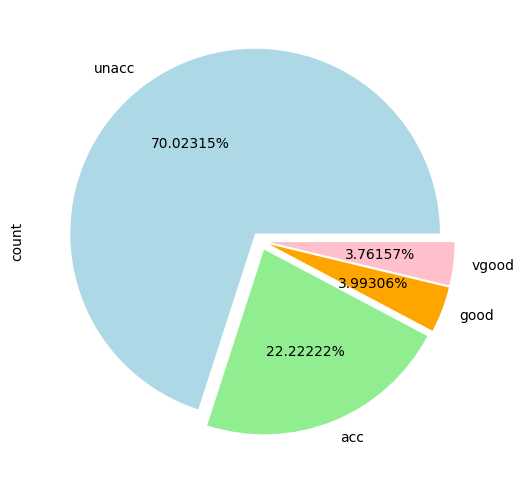

In [112]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [113]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [114]:
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

In [115]:
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [116]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [117]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape) 

torch.Size([1728, 6])
torch.Size([6912])


In [118]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [119]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [120]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [121]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [122]:
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
# output_data = model(input_data)# forward() 메소드가 실행
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [123]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [124]:
# 주어진 함수 정의
def func(x):
    return 5 * x ** 2 + 5 * x + 7

# 도함수(미분) 계산
def derivative(x):
    return 10 * x + 5

# 경사 하강법을 사용하여 기울기가 0인 지점 찾기
def gradient_descent(learning_rate, initial_x, epochs):
    x = initial_x
    for _ in range(epochs):
        gradient = derivative(x)
        x = x - learning_rate * gradient
    return x

# 학습률, 초기값, 반복 횟수 설정
learning_rate = 0.01
initial_x = 0.0
epochs = 1000

# 경사 하강법 적용하여 기울기가 0인 지점 찾기
optimal_x = gradient_descent(learning_rate, initial_x, epochs)
optimal_y = func(optimal_x)

# 결과 출력
print("기울기가 0인 x:", optimal_x)
print("해당 지점에서의 y 값:", optimal_y)

기울기가 0인 x: -0.4999999999999997
해당 지점에서의 y 값: 5.75


In [125]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [126]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.59662950
epoch:  26 loss: 1.37881255
epoch:  51 loss: 1.27624261
epoch:  76 loss: 1.18256819
epoch: 101 loss: 1.05669427
epoch: 126 loss: 0.93214267
epoch: 151 loss: 0.82580072
epoch: 176 loss: 0.74351668
epoch: 201 loss: 0.68590319
epoch: 226 loss: 0.64794219
epoch: 251 loss: 0.62431389
epoch: 276 loss: 0.61999279
epoch: 301 loss: 0.61436224
epoch: 326 loss: 0.60385400
epoch: 351 loss: 0.59320533
epoch: 376 loss: 0.58794475
epoch: 401 loss: 0.58836216
epoch: 426 loss: 0.58107233
epoch: 451 loss: 0.58438200
epoch: 476 loss: 0.57783592
epoch: 500 loss: 0.5703202486


In [127]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.55571860


In [128]:
print(y_val[:5])

tensor([[ 2.8694,  1.5345, -3.1620, -3.2550],
        [ 2.7249,  1.5456, -2.4184, -2.1944],
        [ 3.1923,  1.9411, -3.8894, -3.6226],
        [ 2.2376,  1.2550, -3.6849, -3.6618],
        [ 2.7793,  1.5858, -3.7518, -3.5167]], device='cuda:0')


In [129]:
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

[0 0 0 0 0]


In [130]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[257   2]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       259
           1       0.33      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.54      0.50      0.44       345
weighted avg       0.65      0.75      0.65       345

0.7478260869565218


구글링: 2023.04.18 주피터노트북 VSCode 연동, 가상환경 만들기, GPU사용 환경 세팅(에러 해결 방법), 차유빈·2023년 4월 20일